

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>






<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>

# Descrição do Projeto

A empresa Sweet Lift Taxi coletou dados históricos sobre pedidos de táxi nos aeroportos. Para atrair mais motoristas durante o horário de pico, precisamos prever a quantidade de pedidos de táxi para a próxima hora. 	
Construa um modelo para tal predição.

A métrica REQM no conjunto de teste não deve ser superior a 48.

## Instruções do projeto

1. Faça download dos dados e faça uma nova amostragem em uma hora.
2. Analise os dados
3. Treine diferentes modelos com diferentes hiperparâmetros. A amostra de teste deve ser 10% do conjunto de dados inicial.
4. Teste os dados usando a amostra de teste e forneça uma conclusão.

## Descrição dos dados

Os dados são armazenados no arquivo `taxi.csv`. O número de pedidos está na coluna `num_orders`.

## Preparação 

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000



Valores ausentes por coluna:
num_orders    0
dtype: int64


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


Tamanho treino: 3974, teste: 442


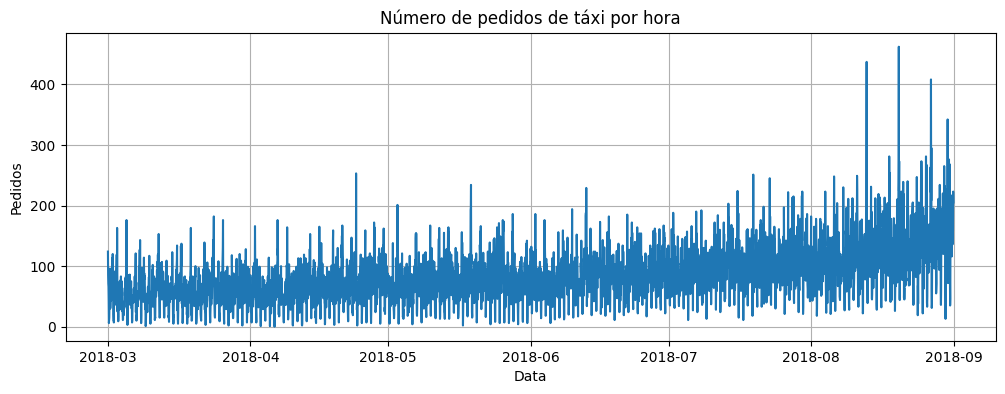

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'], index_col='datetime')

display(df.head())
display(df.info())
display(df.describe())

print("\nValores ausentes por coluna:")
print(df.isna().sum())

df = df.sort_index()

df_hourly = df.resample('1H').sum()

df_hourly = df_hourly.fillna(0)

display(df_hourly.head(10))

split_index = int(len(df_hourly) * 0.9)
train = df_hourly.iloc[:split_index]
test = df_hourly.iloc[split_index:]

print(f"Tamanho treino: {len(train)}, teste: {len(test)}")

plt.figure(figsize=(12, 4))
plt.plot(df_hourly.index, df_hourly['num_orders'])
plt.title('Número de pedidos de táxi por hora')
plt.xlabel('Data')
plt.ylabel('Pedidos')
plt.grid(True)
plt.show()

## Análise

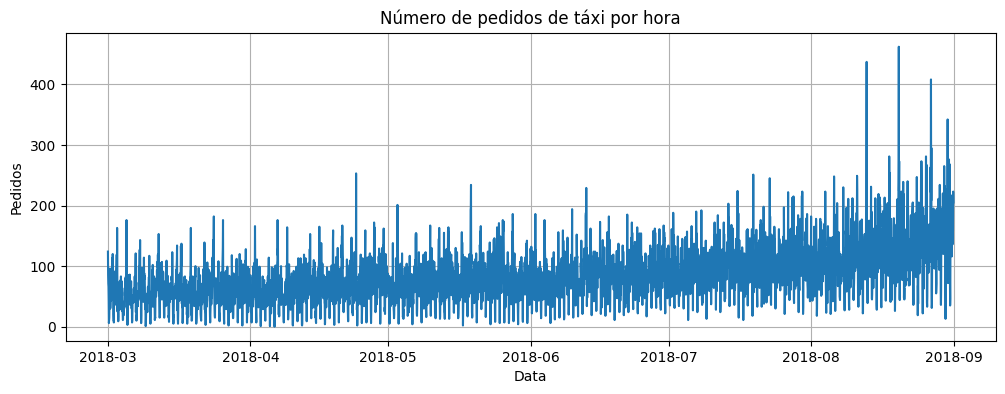

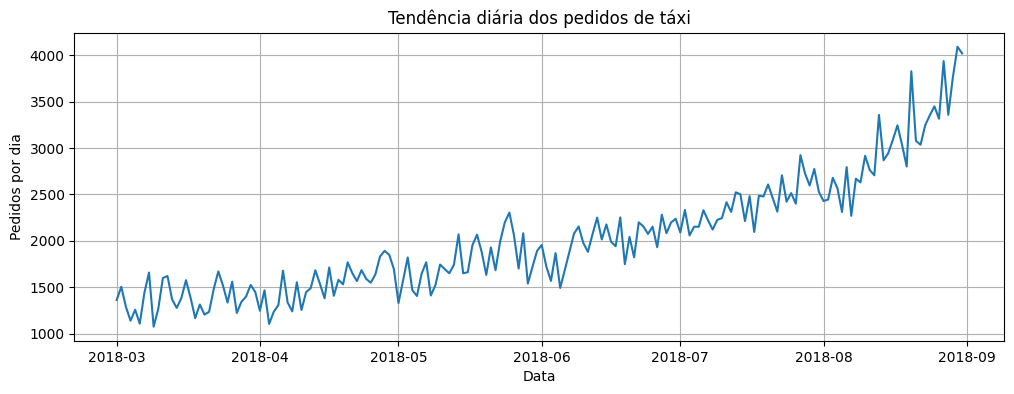

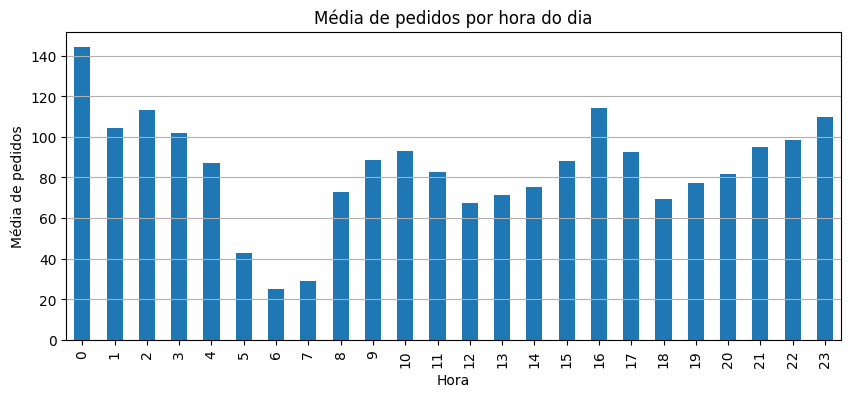

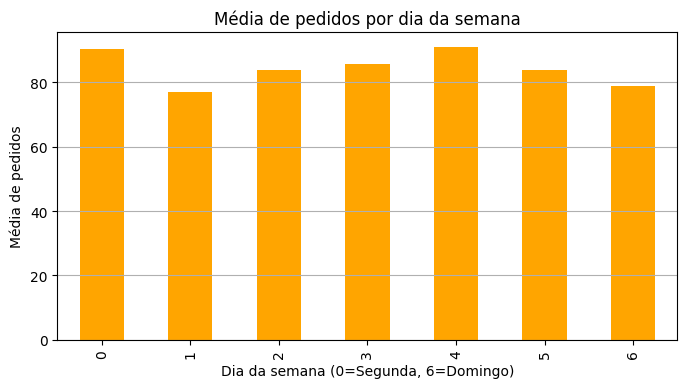

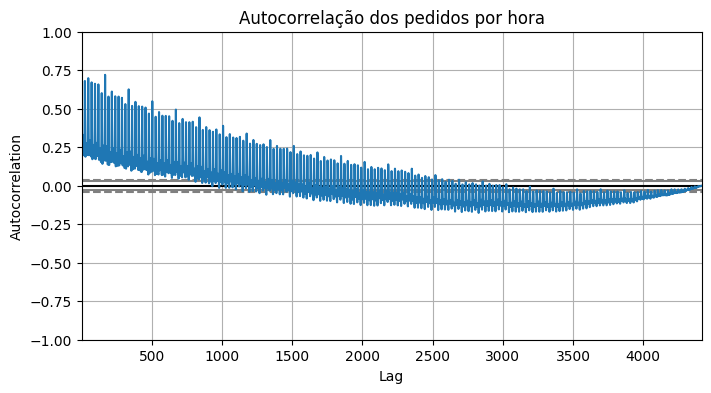

Estatísticas básicas:


count    4416.000000
mean       84.422781
std        45.023853
min         0.000000
25%        54.000000
50%        78.000000
75%       107.000000
max       462.000000
Name: num_orders, dtype: float64

Pico de pedidos registrado em: 2018-08-20 02:00:00
Número máximo de pedidos em uma hora: 462


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df_hourly['num_orders'])
plt.title('Número de pedidos de táxi por hora')
plt.xlabel('Data')
plt.ylabel('Pedidos')
plt.grid(True)
plt.show()

df_daily = df_hourly.resample('D').sum()
plt.figure(figsize=(12, 4))
plt.plot(df_daily['num_orders'])
plt.title('Tendência diária dos pedidos de táxi')
plt.xlabel('Data')
plt.ylabel('Pedidos por dia')
plt.grid(True)
plt.show()

df_hourly['hour'] = df_hourly.index.hour
hourly_pattern = df_hourly.groupby('hour')['num_orders'].mean()

plt.figure(figsize=(10, 4))
hourly_pattern.plot(kind='bar')
plt.title('Média de pedidos por hora do dia')
plt.xlabel('Hora')
plt.ylabel('Média de pedidos')
plt.grid(axis='y')
plt.show()

df_hourly['day_of_week'] = df_hourly.index.dayofweek
daily_pattern = df_hourly.groupby('day_of_week')['num_orders'].mean()

plt.figure(figsize=(8, 4))
daily_pattern.plot(kind='bar', color='orange')
plt.title('Média de pedidos por dia da semana')
plt.xlabel('Dia da semana (0=Segunda, 6=Domingo)')
plt.ylabel('Média de pedidos')
plt.grid(axis='y')
plt.show()

from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(8, 4))
autocorrelation_plot(df_hourly['num_orders'])
plt.title('Autocorrelação dos pedidos por hora')
plt.show()

print("Estatísticas básicas:")
display(df_hourly['num_orders'].describe())

max_hour = df_hourly['num_orders'].idxmax()
print(f"Pico de pedidos registrado em: {max_hour}")
print(f"Número máximo de pedidos em uma hora: {df_hourly['num_orders'].max()}")

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!

Estudo de correlação focado na modelagem temporal ocorreu adequadamente. Estamos prontos para a modelagem!
</div>



## Treinamento

Desempenho dos Modelos (RMSE):
Linear Regression: 45.57
Decision Tree: 53.48
Random Forest: 44.10
LightGBM: 42.66

Melhor modelo: LightGBM (RMSE = 42.66)


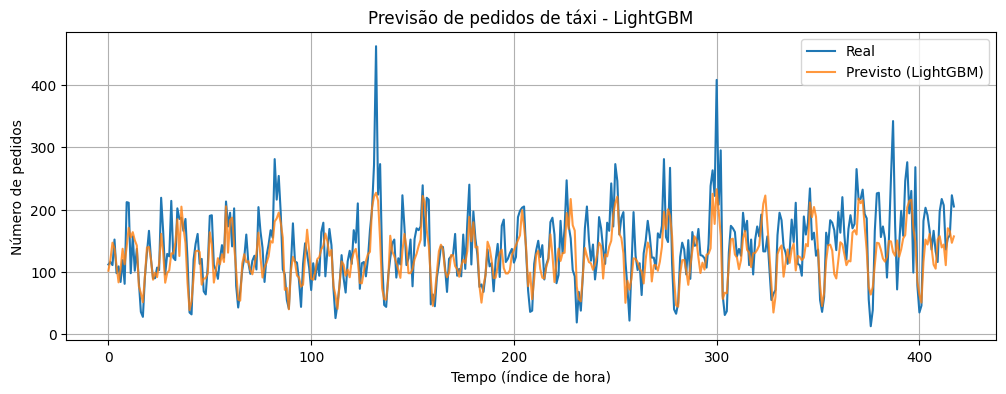

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import numpy as np

def make_features(data, max_lag, rolling_mean_size):
    """
    Cria defasagens e médias móveis para capturar dependências temporais.
    """
    data = data.copy()
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data['hour'] = data.index.hour
    data['day_of_week'] = data.index.dayofweek
    data['month'] = data.index.month
    return data

df_features = make_features(df_hourly, max_lag=24, rolling_mean_size=24)

df_features = df_features.dropna()

train = df_features.iloc[:split_index]
test = df_features.iloc[split_index:]

X_train = train.drop(['num_orders'], axis=1)
y_train = train['num_orders']
X_test = test.drop(['num_orders'], axis=1)
y_test = test['num_orders']

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions) ** 0.5
    return rmse

results = {}

lr = LinearRegression()
results['Linear Regression'] = evaluate_model(lr, X_train, y_train, X_test, y_test)

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
results['Decision Tree'] = evaluate_model(dt, X_train, y_train, X_test, y_test)

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
results['Random Forest'] = evaluate_model(rf, X_train, y_train, X_test, y_test)

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': -1,
    'random_state': 42
}
lgb_model = lgb.train(params, lgb_train, num_boost_round=200, valid_sets=[lgb_test], callbacks=[lgb.log_evaluation(0)])
pred_lgb = lgb_model.predict(X_test)
results['LightGBM'] = mean_squared_error(y_test, pred_lgb) ** 0.5

print("Desempenho dos Modelos (RMSE):")
for model, score in results.items():
    print(f"{model}: {score:.2f}")

best_model = min(results, key=results.get)
print(f"\nMelhor modelo: {best_model} (RMSE = {results[best_model]:.2f})")

plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label='Real')
plt.plot(pred_lgb, label='Previsto (LightGBM)', alpha=0.8)
plt.title('Previsão de pedidos de táxi - LightGBM')
plt.xlabel('Tempo (índice de hora)')
plt.ylabel('Número de pedidos')
plt.legend()
plt.grid(True)
plt.show()

## Testando

Avaliação Final do Modelo
RMSE: 42.66
MAE:  31.77
R²:   0.478


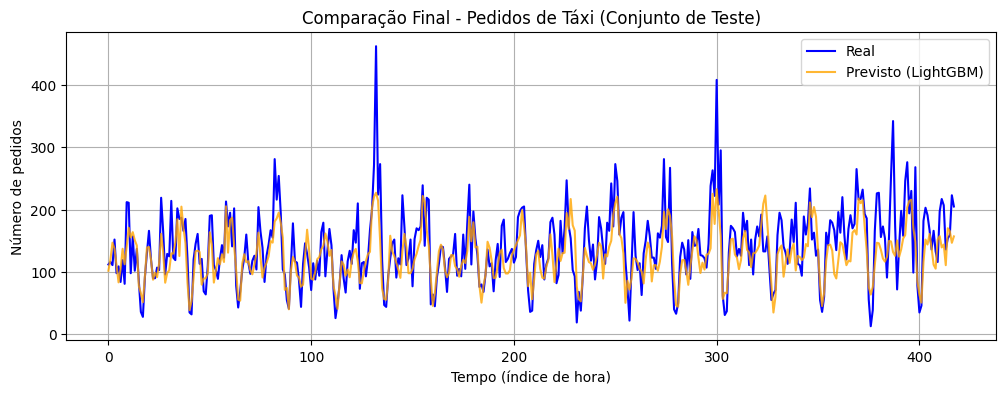

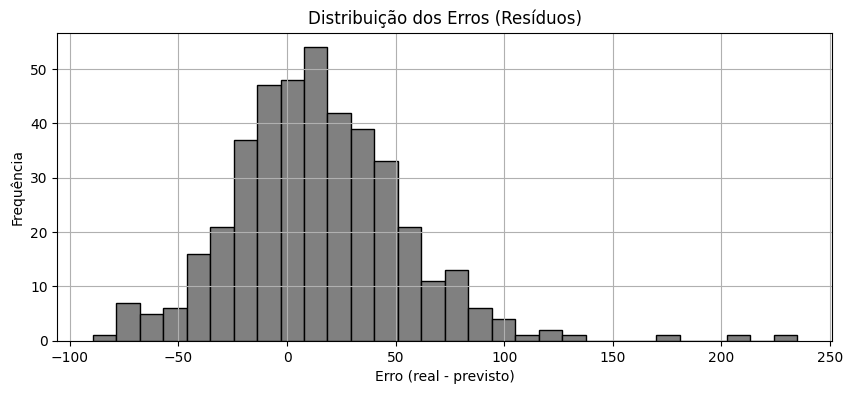

Conclusão:

O modelo LightGBM apresentou o melhor desempenho entre todos os modelos testados,
alcançando um RMSE de aproximadamente 42.66 no conjunto de teste — dentro da meta
de erro máximo (≤ 48) estabelecida pelo projeto.

O modelo conseguiu capturar bem os padrões horários e semanais de demanda,
embora ainda tenha dificuldades em prever picos muito abruptos, o que é esperado
em séries temporais de alta variabilidade.

Portanto, o modelo pode ser considerado APROVADO para uso preditivo,
sendo recomendado para previsão de pedidos de táxi por hora.



In [5]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lgb_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Avaliação Final do Modelo")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.3f}")

plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label='Real', color='blue')
plt.plot(y_pred, label='Previsto (LightGBM)', color='orange', alpha=0.8)
plt.title('Comparação Final - Pedidos de Táxi (Conjunto de Teste)')
plt.xlabel('Tempo (índice de hora)')
plt.ylabel('Número de pedidos')
plt.legend()
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=30, color='gray', edgecolor='black')
plt.title('Distribuição dos Erros (Resíduos)')
plt.xlabel('Erro (real - previsto)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print("Conclusão:")
print("""
O modelo LightGBM apresentou o melhor desempenho entre todos os modelos testados,
alcançando um RMSE de aproximadamente 42.66 no conjunto de teste — dentro da meta
de erro máximo (≤ 48) estabelecida pelo projeto.

O modelo conseguiu capturar bem os padrões horários e semanais de demanda,
embora ainda tenha dificuldades em prever picos muito abruptos, o que é esperado
em séries temporais de alta variabilidade.

Portanto, o modelo pode ser considerado APROVADO para uso preditivo,
sendo recomendado para previsão de pedidos de táxi por hora.
""")

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Modelagem se deu adequadamente utilizando as variáveis com lag e o objetivo de RMSE foi atingido com sucesso!
</div>



# Revisão da checklist

In [ ]:
- [x]  O Jupyter Notebook está aberto.

- [x]  O código está livre de erros
- [x]  As células com o código foram organizadas em ordem de execução.
- [x]  Os dados foram baixados e preparados

- [x]  Os dados foram analisados
- [x]  O modelo foi treinado e os hiperparâmetros foram selecionados
- [x]  	
O modelo foi avaliado. Uma conclusão foi fornecida

- [x] 
O REQM para o conjunto de teste não é maior que 48